In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from keras.datasets import fashion_mnist
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential
from keras import utils

In [2]:
# завантаження даних fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# наочна перевірка розміру, типу тренувальних та тестових даних
print(X_train.shape)
print(type(X_train[0]))
print(len(X_train[0]))
print(X_test.shape)
print(type(X_test[0]))
print(len(X_test[0]))

(60000, 28, 28)
<class 'numpy.ndarray'>
28
(10000, 28, 28)
<class 'numpy.ndarray'>
28


In [4]:
# Зміна розмірності зображень
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
# Нормалізація даних
x_train = x_train / 255
x_test = x_test / 255

# Конвертація в категорії
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
# print("y_train", y_train)
# print("y_test", y_test)


In [5]:
# Створюємо модель нейронної мережі (НМ)
# ВАРІАНТ-1: три шари, кількість нейронів на кожному шарі 320/160/10, функції активації - relu/relu/sigmoid
model_1 = Sequential()
model_1.add(Dense(320, activation='relu', input_shape=(784,)))
model_1.add(Dense(160, activation='relu'))
model_1.add(Dense(10, activation='sigmoid'))

In [6]:
# Компілюємо модель (підгонка терезів нейромережі)
model_1.compile(
    optimizer="SGD", # optimizer='rmsprop'
    loss="categorical_crossentropy",
    metrics=["accuracy"]
    )

In [7]:
# дізнаємося архітектуру створеної НМ
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 320)               251200    
                                                                 
 dense_1 (Dense)             (None, 160)               51360     
                                                                 
 dense_2 (Dense)             (None, 10)                1610      
                                                                 
Total params: 304170 (1.16 MB)
Trainable params: 304170 (1.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# навчання нейронної мережі - передаємо тренувальні та валідаційні дані, встановлюємо максимальну кількість епох, а також встановлюємо розмір пакету даних batch_size=512, на яких буде здійснено навчання.
history_1 = model_1.fit(
                    x_train,
                    y_train,
                    epochs=30,
                    batch_size=512,
                    validation_split=0.2,
                    # verbose=1
                        )

Epoch 1/30
94/94 [==============================] - 4s 33ms/step - loss: 1.7537 - accuracy: 0.4930 - val_loss: 1.3068 - val_accuracy: 0.6519
Epoch 2/30
94/94 [==============================] - 3s 36ms/step - loss: 1.1176 - accuracy: 0.6708 - val_loss: 0.9642 - val_accuracy: 0.6931
Epoch 3/30
94/94 [==============================] - 4s 39ms/step - loss: 0.8981 - accuracy: 0.7143 - val_loss: 0.8260 - val_accuracy: 0.7372
Epoch 4/30
94/94 [==============================] - 3s 33ms/step - loss: 0.7943 - accuracy: 0.7471 - val_loss: 0.7489 - val_accuracy: 0.7615
Epoch 5/30
94/94 [==============================] - 2s 25ms/step - loss: 0.7299 - accuracy: 0.7685 - val_loss: 0.6988 - val_accuracy: 0.7776
Epoch 6/30
94/94 [==============================] - 2s 18ms/step - loss: 0.6846 - accuracy: 0.7812 - val_loss: 0.6615 - val_accuracy: 0.7890
Epoch 7/30
94/94 [==============================] - 2s 23ms/step - loss: 0.6500 - accuracy: 0.7916 - val_loss: 0.6332 - val_accuracy: 0.7947
Epoch 8/30
94

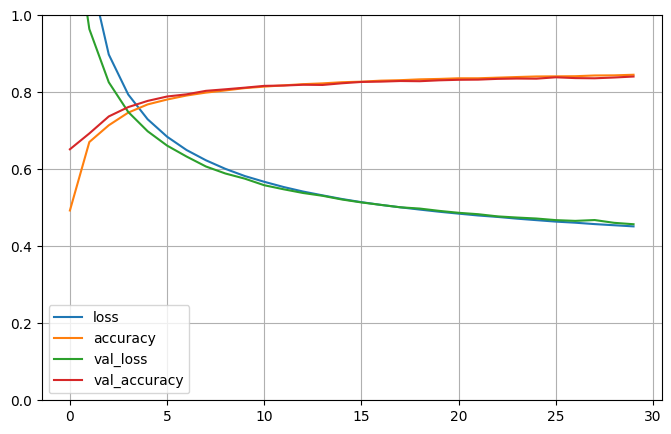

In [69]:
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
# Оцінка якості моделі-1
results_1 = model_1.evaluate(x_test, y_test)
print(f'відсоток вірних відповідей - {round(results_1[1] * 100, 1)}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.4815 - accuracy: 0.8328
відсоток вірних відповідей - 83.3%


Висновок щодо МОДЕЛІ-1: гіперпараметри підібрані не достатньо точно для досягнення результату відповідно до вимог ДЗ

In [10]:
# Створюємо модель нейронної мережі (НМ)
# ВАРІАНТ-2: п'ять шарів, кількість нейронів на кожному шарі 1280/640/320/160/10, функції активації - relu/relu/relu/relu/sigmoid
model_2 = Sequential()
model_2.add(Dense(1280, activation='relu', input_shape=(784,)))
model_2.add(Dense(640, activation='relu'))
model_2.add(Dense(320, activation='relu'))
model_2.add(Dense(160, activation='relu'))
model_2.add(Dense(10, activation='sigmoid'))

In [11]:
# Компілюємо модель (підгонка терезів нейромережі)
model_2.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
    )

In [12]:
# дізнаємося архітектуру створеної НМ
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1280)              1004800   
                                                                 
 dense_4 (Dense)             (None, 640)               819840    
                                                                 
 dense_5 (Dense)             (None, 320)               205120    
                                                                 
 dense_6 (Dense)             (None, 160)               51360     
                                                                 
 dense_7 (Dense)             (None, 10)                1610      
                                                                 
Total params: 2082730 (7.94 MB)
Trainable params: 2082730 (7.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# навчання нейронної мережі - передаємо тренувальні та валідаційні дані, встановлюємо максимальну кількість епох, а також встановлюємо розмір пакету даних batch_size=512, на яких буде здійснено навчання.
history_2 = model_2.fit(
                    x_train,
                    y_train,
                    epochs=50,
                    batch_size=512,
                    validation_split=0.2,
                    verbose=1
                        )

Epoch 1/50
94/94 [==============================] - 11s 113ms/step - loss: 0.9290 - accuracy: 0.6606 - val_loss: 0.6064 - val_accuracy: 0.7650
Epoch 2/50
94/94 [==============================] - 9s 100ms/step - loss: 0.5363 - accuracy: 0.8017 - val_loss: 0.5101 - val_accuracy: 0.8108
Epoch 3/50
94/94 [==============================] - 11s 115ms/step - loss: 0.4550 - accuracy: 0.8326 - val_loss: 0.4052 - val_accuracy: 0.8554
Epoch 4/50
94/94 [==============================] - 11s 116ms/step - loss: 0.4028 - accuracy: 0.8490 - val_loss: 0.4105 - val_accuracy: 0.8440
Epoch 5/50
94/94 [==============================] - 11s 116ms/step - loss: 0.3775 - accuracy: 0.8591 - val_loss: 0.3884 - val_accuracy: 0.8584
Epoch 6/50
94/94 [==============================] - 11s 116ms/step - loss: 0.3477 - accuracy: 0.8700 - val_loss: 0.4037 - val_accuracy: 0.8568
Epoch 7/50
94/94 [==============================] - 10s 110ms/step - loss: 0.3290 - accuracy: 0.8745 - val_loss: 0.3483 - val_accuracy: 0.8727


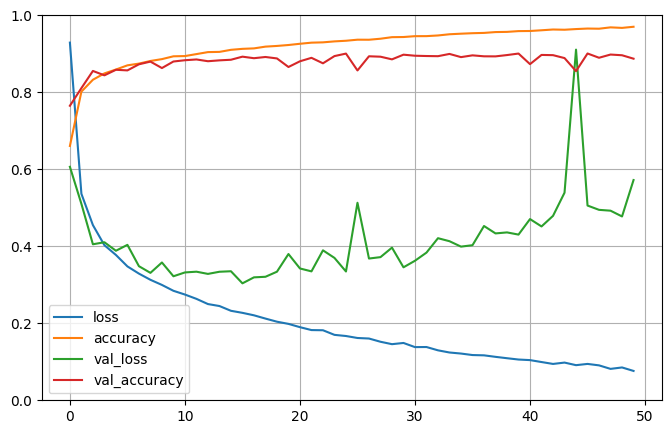

In [70]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
# Оцінка якості моделі-1
results_2 = model_2.evaluate(x_test, y_test)
print(f'відсоток вірних відповідей - {round(results_2[1] * 100, 1)}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.5994 - accuracy: 0.8861
відсоток вірних відповідей - 88.6%


Висновок щодо МОДЕЛІ-2: Гіперпараметри підбрані краще, але виконання коду зайняло багато часу (~ 11 хв, при другому запуску ~ 9 хв)


In [24]:
# Створюємо модель нейронної мережі (НМ)
# ВАРІАНТ-3: два шари, кількість нейронів на кожному шарі 1000/10, функції активації - sigmoid/relu
model_3 = Sequential()
model_3.add(Dense(1000, activation='sigmoid', input_shape=(784,)))
model_3.add(Dense(10, activation='relu'))

In [25]:
# Компілюємо модель (підгонка терезів нейромережі)
model_3.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
    )

In [26]:
# дізнаємося архітектуру створеної НМ
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1000)              785000    
                                                                 
 dense_13 (Dense)            (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# навчання нейронної мережі - передаємо тренувальні та валідаційні дані, встановлюємо максимальну кількість епох, а також встановлюємо розмір пакету даних batch_size=512, на яких буде здійснено навчання.
history_3 = model_3.fit(
                    x_train,
                    y_train,
                    epochs=5,
                    batch_size=1024,
                    validation_split=0.2,
                        )

Epoch 1/5
47/47 [==============================] - 5s 92ms/step - loss: 4.2420 - accuracy: 0.3954 - val_loss: nan - val_accuracy: 0.5972
Epoch 2/5
47/47 [==============================] - 4s 75ms/step - loss: nan - accuracy: 0.1104 - val_loss: nan - val_accuracy: 0.1030
Epoch 3/5
47/47 [==============================] - 4s 75ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 4/5
47/47 [==============================] - 4s 95ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030
Epoch 5/5
47/47 [==============================] - 4s 75ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1030


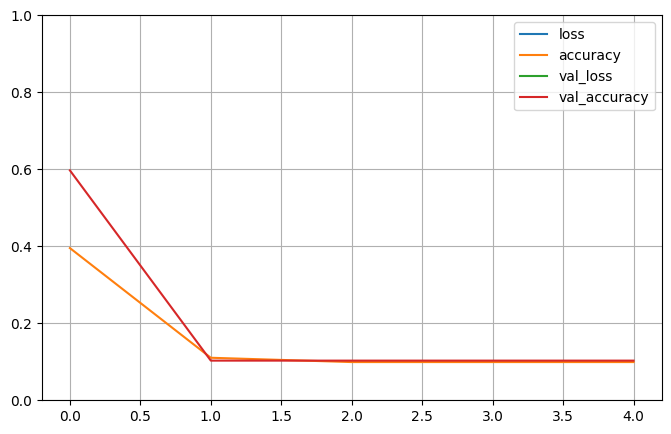

In [71]:
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
# Оцінка якості моделі-3
results_3 = model_3.evaluate(x_test, y_test)
print(f'відсоток вірних відповідей - {round(results_3[1] * 100, 1)}%')

313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
відсоток вірних відповідей - 10.0%


Висновок щодо МОДЕЛІ-3: гіперпараметри підбрані невдало, що призводить до низької результативності НМ

In [40]:
# Створюємо модель нейронної мережі (НМ)
# ВАРІАНТ-4: три шари, кількість нейронів на кожному шарі 1280/640/320/160/10, функції активації - relu/relu/relu/relu/sigmoid
model_4 = Sequential()
model_4.add(Dense(800, activation='linear', input_shape=(784,)))
model_4.add(Dense(400, activation='relu'))
model_4.add(Dense(10, activation='sigmoid'))

In [41]:
# Компілюємо модель (підгонка терезів нейромережі)
model_4.compile(
    optimizer="adamax",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
    )

In [42]:
# дізнаємося архітектуру створеної НМ
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 800)               628000    
                                                                 
 dense_21 (Dense)            (None, 400)               320400    
                                                                 
 dense_22 (Dense)            (None, 10)                4010      
                                                                 
Total params: 952410 (3.63 MB)
Trainable params: 952410 (3.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# навчання нейронної мережі - передаємо тренувальні та валідаційні дані, встановлюємо максимальну кількість епох, а також встановлюємо розмір пакету даних batch_size=512, на яких буде здійснено навчання.
history_4 = model_4.fit(
                    x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    verbose="auto"
                        )

Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.5172 - accuracy: 0.8195
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3888 - accuracy: 0.8609
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3469 - accuracy: 0.8750
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.3217 - accuracy: 0.8831
Epoch 5/10
469/469 [==============================] - 9s 18ms/step - loss: 0.3002 - accuracy: 0.8900
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2823 - accuracy: 0.8964
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2681 - accuracy: 0.9028
Epoch 8/10
469/469 [==============================] - 8s 18ms/step - loss: 0.2569 - accuracy: 0.9051
Epoch 9/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2478 - accuracy: 0.9090
Epoch 10/10
469/469 [==============================] - 8s 18ms/step - loss: 0.2359 - accura

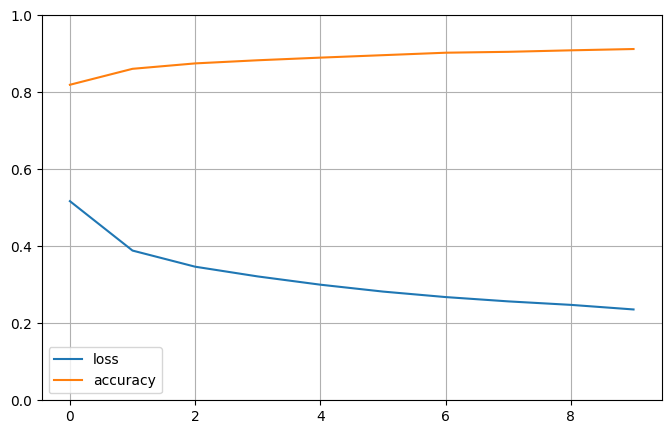

In [72]:
pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [44]:
# Оцінка якості моделі-4
results_4 = model_4.evaluate(x_test, y_test)
print(f'відсоток вірних відповідей - {round(results_4[1] * 100, 1)}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.8878
відсоток вірних відповідей - 88.8%


Висновок щодо МОДЕЛІ-4: Модель побудована із гіперпараметрами що в результаті дають досить високий показник точності. Також ця модель  швдше навчається  за модель-2 (1хв проти 9 хв)

In [45]:
# Створюємо модель нейронної мережі (НМ)
# ВАРІАНТ-5: Аналогічна моделі-4, з відмінністю у додаванні 2-х шарів вимикання нейронів
model_5 = Sequential()
model_5.add(Dense(800, activation='linear', input_shape=(784,)))
model_5.add(Dropout(0,2))
model_5.add(Dense(400, activation='relu'))
model_5.add(Dropout(0,2))
model_5.add(Dense(10, activation='sigmoid'))

In [46]:
# Компілюємо модель (підгонка терезів нейромережі)
model_5.compile(
    optimizer="adamax",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
    )

In [47]:
# дізнаємося архітектуру створеної НМ
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 800)               628000    
                                                                 
 dropout (Dropout)           (None, 800)               0         
                                                                 
 dense_24 (Dense)            (None, 400)               320400    
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                4010      
                                                                 
Total params: 952410 (3.63 MB)
Trainable params: 952410 (3.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# навчання нейронної мережі - передаємо тренувальні та валідаційні дані, встановлюємо максимальну кількість епох, а також встановлюємо розмір пакету даних batch_size=512, на яких буде здійснено навчання.
history_5 = model_5.fit(
                    x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    verbose="auto"
                        )

Epoch 1/10
469/469 [==============================] - 10s 19ms/step - loss: 0.5109 - accuracy: 0.8208
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3840 - accuracy: 0.8640
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.3466 - accuracy: 0.8754
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3196 - accuracy: 0.8849
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.2994 - accuracy: 0.8901
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2831 - accuracy: 0.8961
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2675 - accuracy: 0.9024
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2540 - accuracy: 0.9066
Epoch 9/10
469/469 [==============================] - 8s 18ms/step - loss: 0.2452 - accuracy: 0.9100
Epoch 10/10
469/469 [==============================] - 8s 18ms/step - loss: 0.2329 - accur

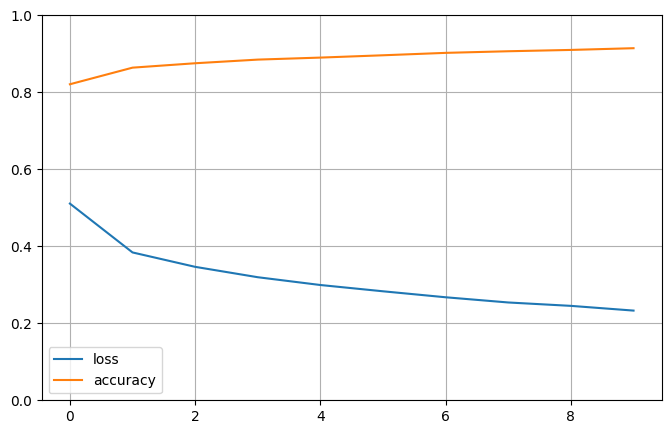

In [73]:
pd.DataFrame(history_5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
# Оцінка якості моделі-5
results_5 = model_5.evaluate(x_test, y_test)
print(f'відсоток вірних відповідей - {round(results_5[1] * 100, 1)}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.3277 - accuracy: 0.8837
відсоток вірних відповідей - 88.4%


Висновок щодо МОДЕЛІ-5: в порівнянні із моделлю-4 додавання шарів вимкнення нейронів призвело до несуттєвого погіршення (0,4%) результативності НМ.

In [54]:
# Створюємо модель нейронної мережі (НМ)
# ВАРІАНТ-6:
model_6 = Sequential()
model_6.add(Dense(128, activation='relu', input_shape=[784,]))
model_6.add(Dense(128, activation='relu'))
model_6.add(Dropout(0,2))
model_6.add(Dense(10, activation='softmax'))

In [58]:
# Компілюємо модель (підгонка терезів нейромережі)
model_6.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)


In [59]:
# дізнаємося архітектуру створеної НМ
model_6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 128)               100480    
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# навчання нейронної мережі - передаємо тренувальні та валідаційні дані, встановлюємо максимальну кількість епох, а також встановлюємо розмір пакету даних batch_size=512, на яких буде здійснено навчання.
history_6 = model_6.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=512,
    verbose="auto"
)

Epoch 1/30
118/118 [==============================] - 2s 13ms/step - loss: 0.2162 - accuracy: 0.9194
Epoch 2/30
118/118 [==============================] - 1s 8ms/step - loss: 0.2049 - accuracy: 0.9243
Epoch 3/30
118/118 [==============================] - 1s 8ms/step - loss: 0.1990 - accuracy: 0.9256
Epoch 4/30
118/118 [==============================] - 1s 8ms/step - loss: 0.1960 - accuracy: 0.9275
Epoch 5/30
118/118 [==============================] - 1s 8ms/step - loss: 0.1921 - accuracy: 0.9293
Epoch 6/30
118/118 [==============================] - 1s 8ms/step - loss: 0.1886 - accuracy: 0.9302
Epoch 7/30
118/118 [==============================] - 1s 8ms/step - loss: 0.1841 - accuracy: 0.9312
Epoch 8/30
118/118 [==============================] - 1s 8ms/step - loss: 0.1798 - accuracy: 0.9345
Epoch 9/30
118/118 [==============================] - 1s 8ms/step - loss: 0.1769 - accuracy: 0.9344
Epoch 10/30
118/118 [==============================] - 1s 8ms/step - loss: 0.1754 - accuracy: 0.934

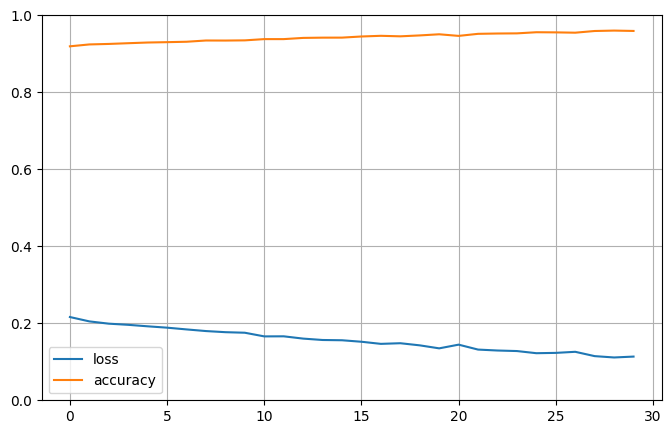

In [74]:
pd.DataFrame(history_6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Висновок щодо МОДЕЛІ-6: Модель побудована із гіперпараметрами що в результаті дають досить високий показник точності. За показниками ефективності відповідає моделі-4